In [3]:
import pandas as pd

df = pd.read_csv('sales_data.csv')
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

          ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0    2/24/2003 0:00  Shipped       1         2     2003  ...   
1  05/07/2003 00:00  Shipped       2         5     2003  ...   
2  07/01/2003 00:00  Shipped       3         7     2003  ...   
3    8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 00:00  Shipped       4        10     2003  ...   

              PHONE                   ADDRESSLINE1 ADDRESSLINE2  \
0        2125557818        897 Long Airport Avenue          NaN   
1        26.47.1555             59 rue de l'Abbaye          NaN   
2  +33 1 46 62 7555  27 rue du Colonel Pierre Avia          NaN   
3        6265557265             78934 Hillside Dr.          NaN   
4        6505551386                7734 Strong St.          NaN   

            CITY STATE POSTALCODE        COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022  United States       NaN              Yu   
1          Reims   NaN      51100         France      EMEA         Henriot   
2          Paris   NaN      75508         France      EMEA        Da Cunha   
3       Pasadena    CA      90003            USA       NaN           Young   
4  San Francisco    CA        NaN  United States       NaN           Brown   

  CONTACTFIRSTNAME  
0             Kwai  
1             Paul  
2           Daniel  
3            Julie  
4            Julie  

[5 rows x 24 columns]

In [5]:
import plotly.express as px

In [7]:
fig = px.scatter(data_frame=df,
                 x='ORDERDATE',
                 y='SALES',
                 color='COUNTRY',
                 hover_name='COUNTRY',
                 title='Sales by Date and Region')

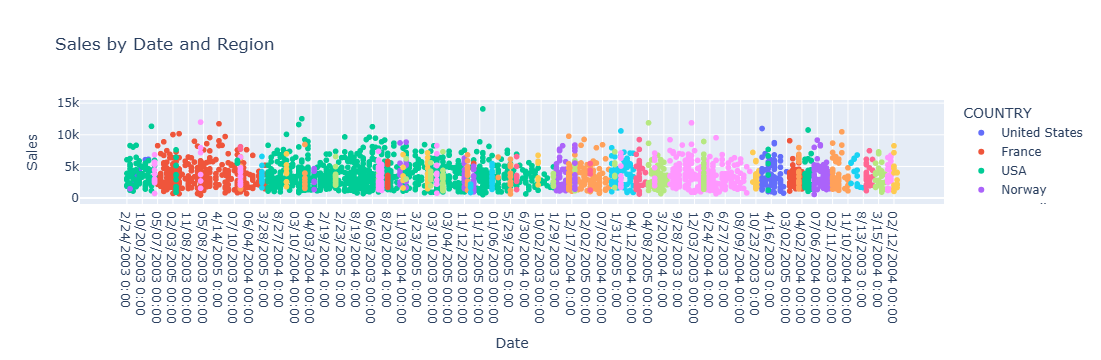

In [9]:
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Sales',
                  hovermode='closest')

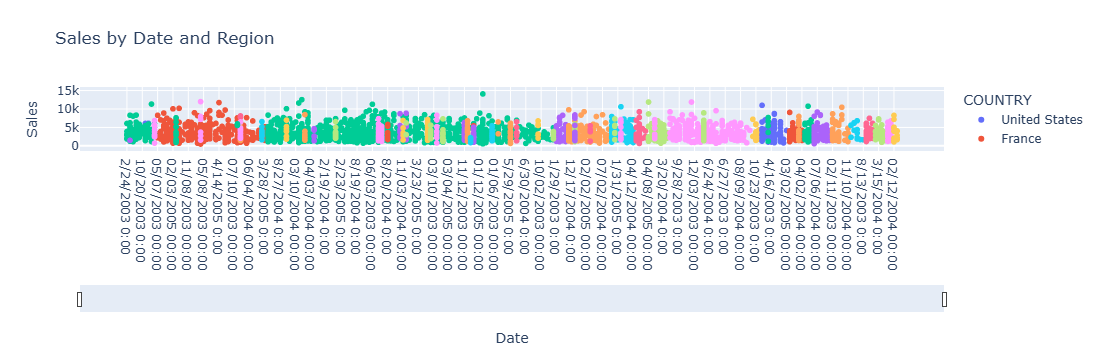

In [11]:
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1m", step="month", stepmode="backward"),
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="YTD", step="year", stepmode="todate"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 ))

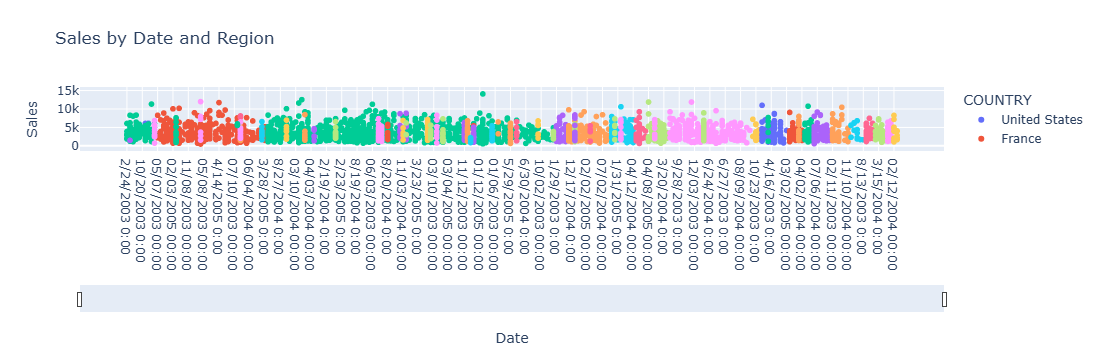

In [13]:
fig.show()

In [15]:
data = px.data.gapminder()
data.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [17]:
fig = px.scatter(data_frame=data,
                 x='gdpPercap',
                 y='lifeExp',
                 size='pop',
                 color='continent',
                 hover_name='country',
                 log_x=True,
                 title='Gapminder: Life Expectancy vs GDP per Capita'
                 )

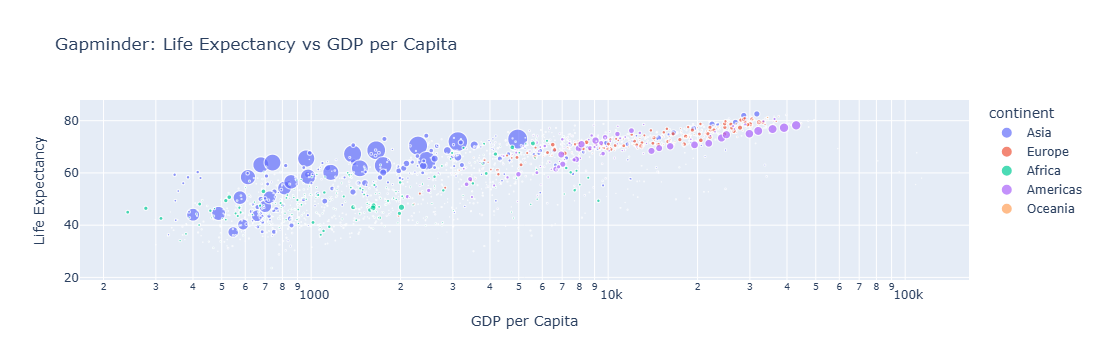

In [19]:
fig.update_layout(xaxis_title='GDP per Capita',
                  yaxis_title='Life Expectancy',
                  hovermode='closest')

In [21]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.express as px

# Function to generate a date range
def date_range(start, end):
    r = (end+timedelta(days=1)-start).days
    return [start+timedelta(days=i) for i in range(r)]

# Generate a date range for 1 year
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 12, 31)
dates = date_range(start_date, end_date)

# Generate dummy data
np.random.seed(0) # For reproducibility
data = {
    'Date': dates,
    'Category': np.random.choice(['Electronics', 'Clothing', 'Furniture'], size=len(dates)),
    'Price': np.random.randint(10, 100, size=len(dates)),
    'QuantitySold': np.random.randint(1, 100, size=len(dates)),
    'CustomerSatisfaction': np.random.randint(1, 6, size=len(dates))
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

        Date     Category  Price  QuantitySold  CustomerSatisfaction
0 2020-01-01  Electronics     63             7                     5
1 2020-01-02     Clothing     58            39                     4
2 2020-01-03  Electronics     69            76                     4
3 2020-01-04     Clothing     90            86                     5
4 2020-01-05     Clothing     36            51                     4


In [23]:
df.Category.unique()

array(['Electronics', 'Clothing', 'Furniture'], dtype=object)

In [25]:
import plotly.graph_objects as go

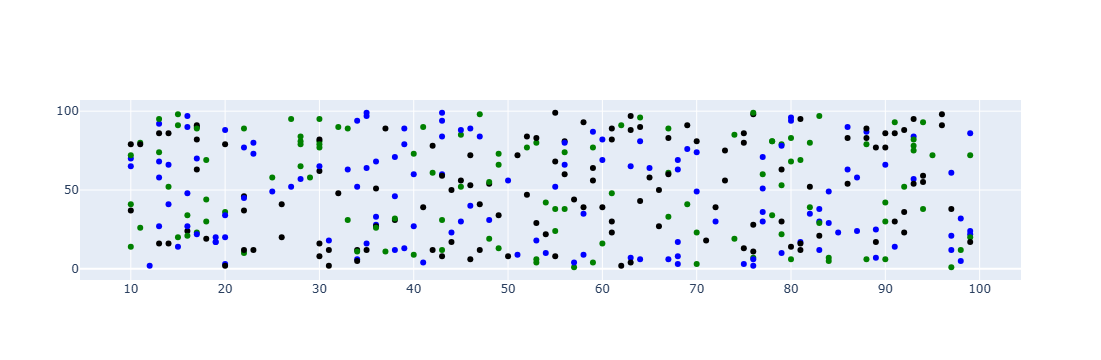

In [27]:
# Define a color mapping for the species
color_dict = {'Electronics': 'blue', 'Clothing': 'black', 'Furniture': 'green'}

fig = go.Figure(data=go.Scatter(x=df['Price'], y=df['QuantitySold'], mode='markers', 
                                marker=dict(color=[color_dict[species] for species in df['Category']])
))
fig.show()


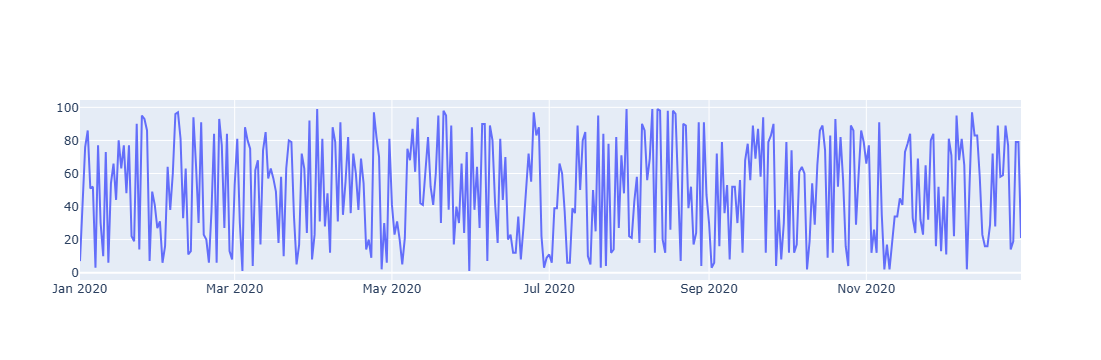

In [29]:
fig = go.Figure(data=go.Scatter(x=df['Date'], y=df['QuantitySold'], mode='lines'))
fig.show()

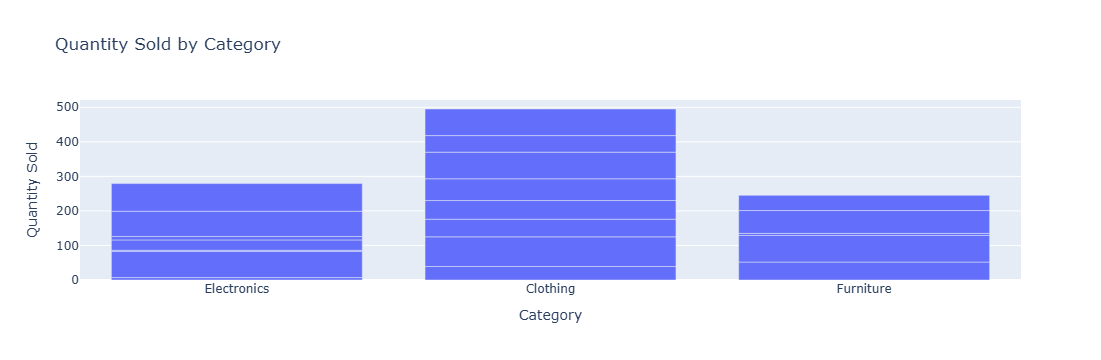

In [31]:
df_sliced = df.head(20)
fig = go.Figure(data=[go.Bar(x=df_sliced['Category'], y=df_sliced['QuantitySold'])])
# Update layout to add axis labels
fig.update_layout(
    title="Quantity Sold by Category",
    xaxis_title="Category",
    yaxis_title="Quantity Sold"
)
fig.show()

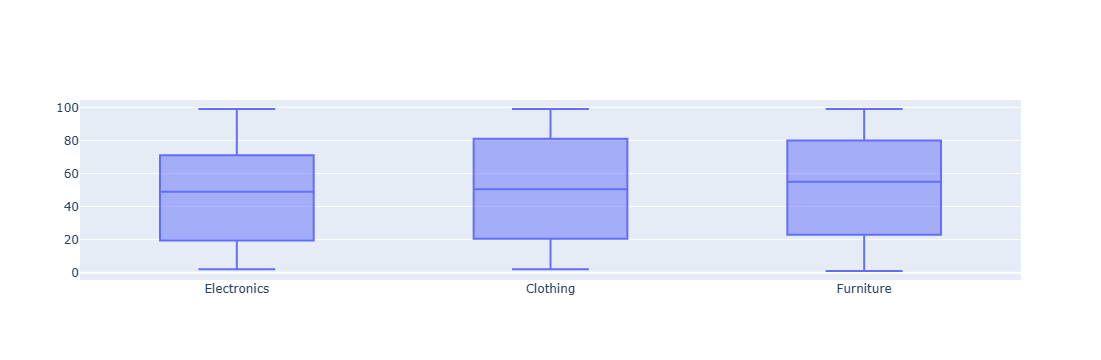

In [33]:
fig = go.Figure(data=[go.Box(y=df['QuantitySold'], x=df['Category'])])
fig.show()

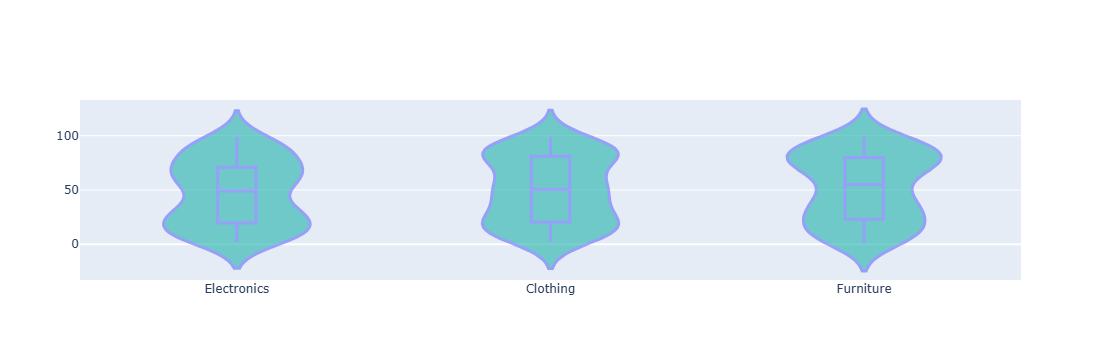

In [35]:
fig = go.Figure(data=go.Violin(y=df['QuantitySold'], x=df['Category'], box_visible=True, line_width=3, fillcolor='lightseagreen', opacity=0.6))
fig.show()

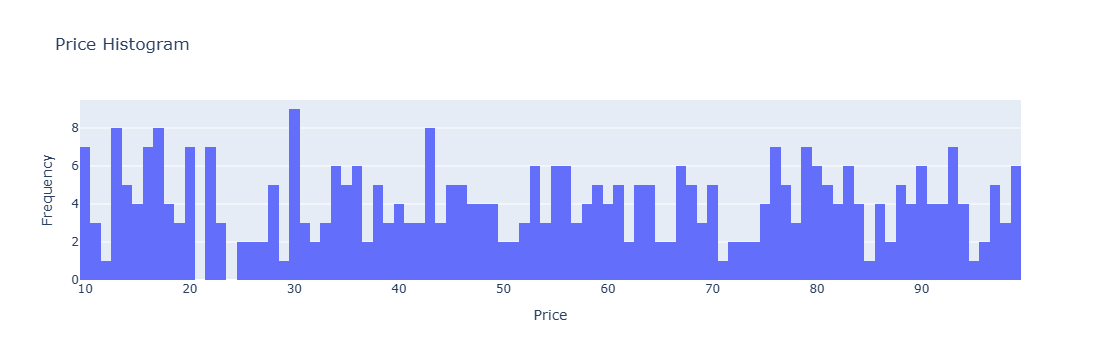

In [37]:
fig = go.Figure(data=[go.Histogram(x=df['Price'],xbins=dict(size=1))])
# Update layout to add axis labels
fig.update_layout(
    title="Price Histogram",
    xaxis_title="Price",
    yaxis_title="Frequency"
)
fig.show()

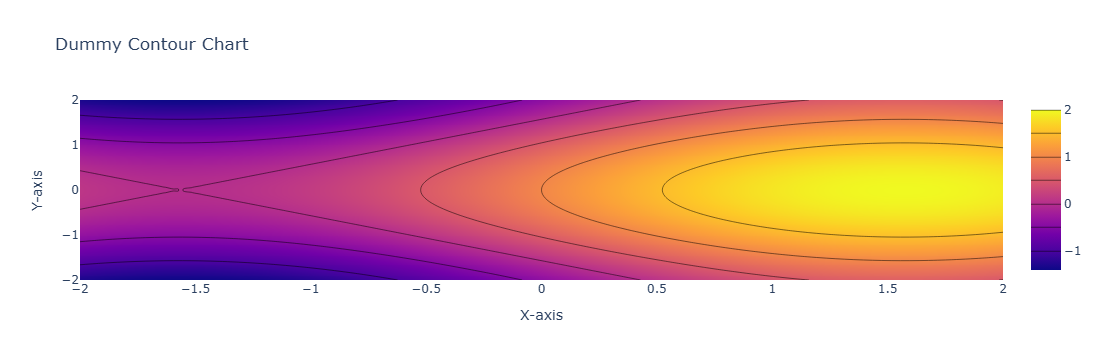

In [39]:
# Generate dummy data for contour plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)

# Create Contour plot
fig = go.Figure(go.Contour(
    x=x,
    y=y,
    z=Z,
    contours=dict(
        coloring='heatmap'
    )
))

# Update layout
fig.update_layout(
    title="Dummy Contour Chart",
    xaxis_title="X-axis",
    yaxis_title="Y-axis",
)

# Show plot
fig.show()

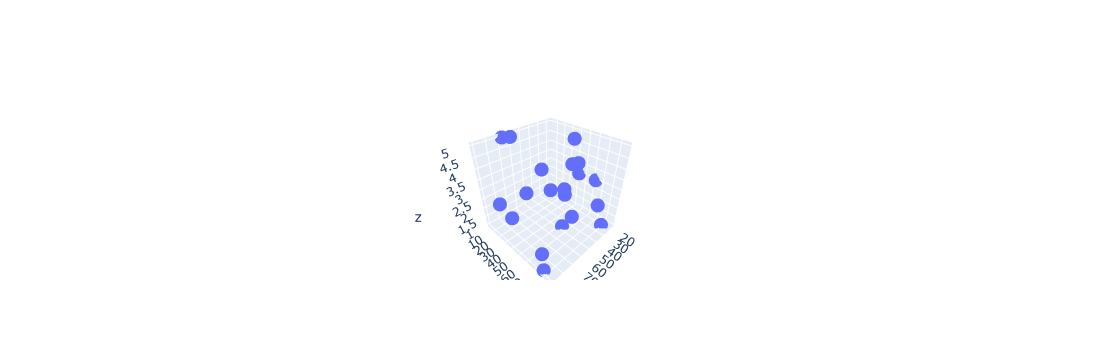

In [41]:
df_sliced = df.head(20)
fig = go.Figure(data=[go.Scatter3d(x=df_sliced['Price'], y=df_sliced['QuantitySold'], z=df_sliced['CustomerSatisfaction'], mode='markers')])
fig.show()

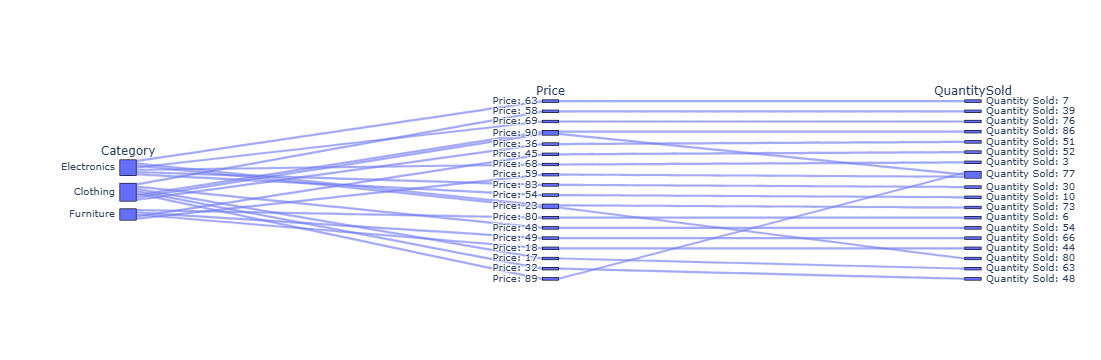

In [43]:
df_sliced = df.head(20)

# Now, use 'df_sliced' for creating the parallel categories plot
fig = go.Figure(data=go.Parcats(
    dimensions=list([
        dict(label='Category', values=df_sliced['Category']),
        dict(label='Price', values=df_sliced['Price'].apply(lambda x: f'Price: {x}')),
        dict(label='QuantitySold', values=df_sliced['QuantitySold'].apply(lambda x: f'Quantity Sold: {x}'))
    ])
))

fig.show()

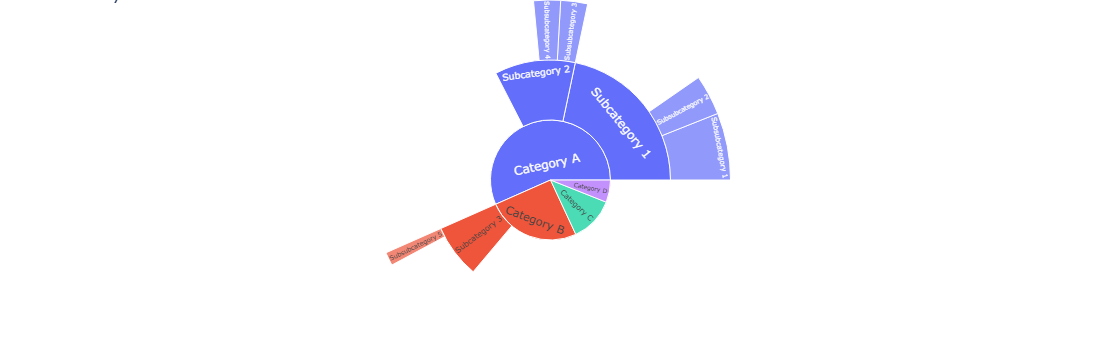

In [45]:
# Define dummy data
labels = ["Category A", "Category B", "Category C", "Category D",
          "Subcategory 1", "Subcategory 2", "Subcategory 3",
          "Subsubcategory 1", "Subsubcategory 2",
          "Subsubcategory 3", "Subsubcategory 4", "Subsubcategory 5"]
parents = ["", "", "", "",
           "Category A", "Category A", "Category B",
           "Subcategory 1", "Subcategory 1",
           "Subcategory 2", "Subcategory 2", "Subcategory 3"]
values = [20, 15, 10, 5,
          10, 5, 5,
          5, 3,
          2, 2, 1]

# Create Sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
))

# Update layout
fig.update_layout(
    title="Dummy Sunburst Chart",
    margin=dict(t=0, l=0, r=0, b=0),
)

# Show plot
fig.show()

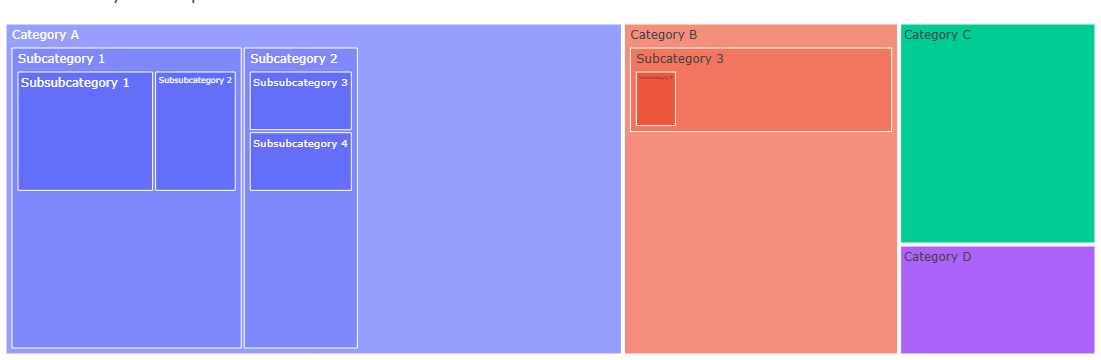

In [47]:
# Create Treemap chart
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents,
    values=values,
))

# Update layout
fig.update_layout(
    title="Dummy Treemap Chart",
    margin=dict(t=0, l=0, r=0, b=0),
)

# Show plot
fig.show()

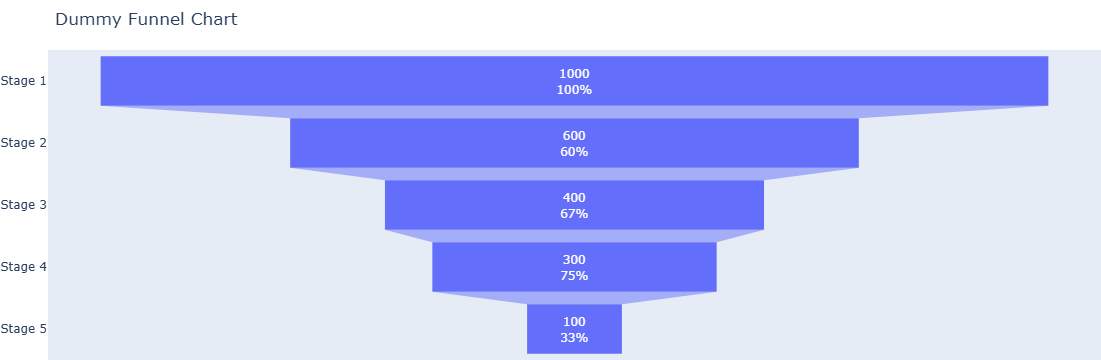

In [49]:
# Define dummy data for stages of a funnel
stages = ["Stage 1", "Stage 2", "Stage 3", "Stage 4", "Stage 5"] #stages represents the stages of the funnel.
values = [1000, 600, 400, 300, 100] #values represents the corresponding values or counts for each stage.

# Create Funnel chart
fig = go.Figure(go.Funnel(
    #go.Funnel() creates the Funnel chart.
    y=stages,
    x=values,
    textinfo="value+percent previous"
    #textinfo="value+percent previous" displays both the absolute value and the percentage of the previous stage's value.
))

# Update layout
fig.update_layout(
    title="Dummy Funnel Chart",
    funnelmode="stack",
    margin=dict(t=50, l=0, r=0, b=0),
)

# Show plot
fig.show()

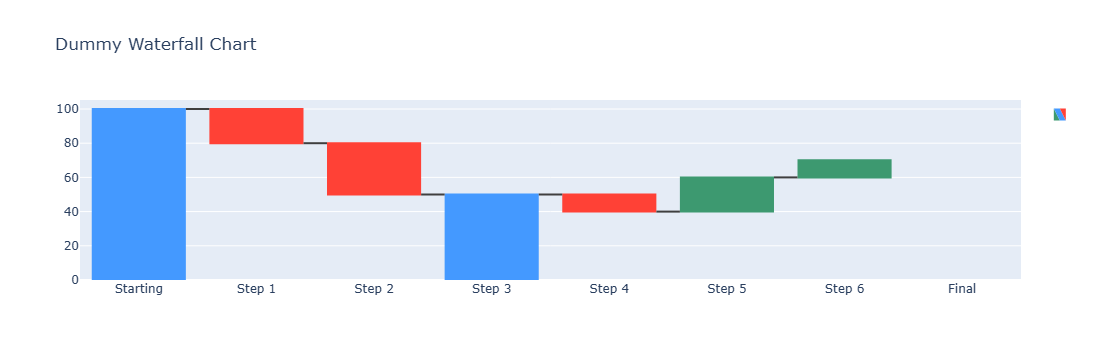

In [51]:
categories = ["Starting", "Step 1", "Step 2", "Step 3","Step 4","Step 5","Step 6","Final"] #categories represents the stages or categories of the waterfall chart.
values = [100, -20, -30, 10, -10,20,10, None]
#values represents the corresponding changes in value for each stage. 
#Positive values represent increases, while negative values represent decreases. 
#The last value is typically set to None to represent the final total value.

# Create Waterfall chart
fig = go.Figure(go.Waterfall(
    name="",
    orientation="v",
    measure=["absolute", "relative", "relative", "total", "relative"], 
    #The measure parameter specifies how the values are calculated and displayed in the chart.
    x=categories,
    y=values,
    connector={"line":{"color":"rgb(63, 63, 63)"}},
))

# Update layout
fig.update_layout(
    title="Dummy Waterfall Chart",
    showlegend=True,
    )

# Show plot
fig.show()

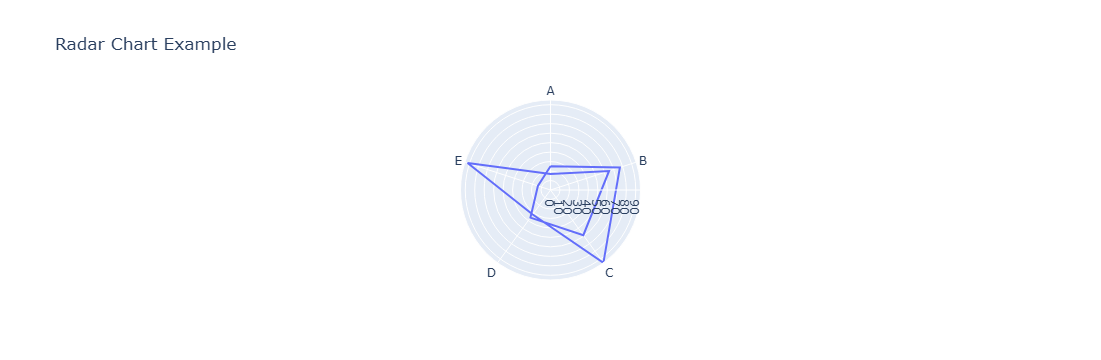

In [53]:
df = pd.DataFrame({
    "Category": ["A", "B", "C", "D", "E"] * 2,
    "Value": np.random.randint(10, 100, 10) # (low,high,size)
})

fig = px.line_polar(df, r="Value", theta="Category", line_close=True, title="Radar Chart Example")
fig.show()

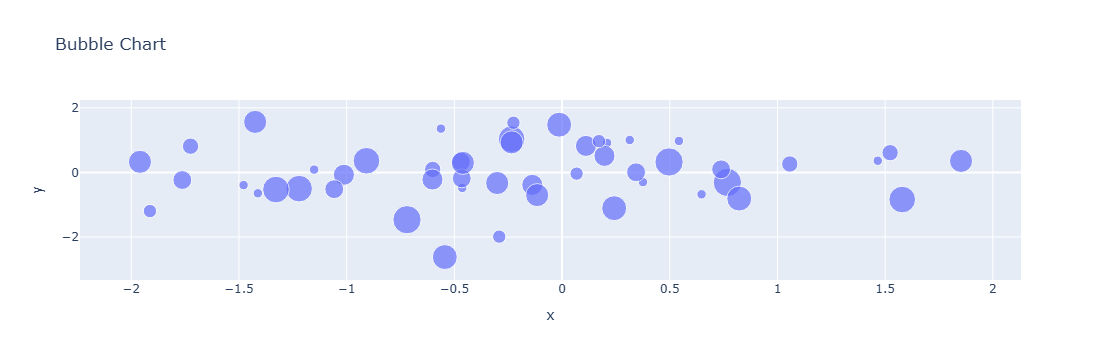

In [55]:
# Generate dummy data
np.random.seed(42)
num_points = 50
data = pd.DataFrame({
    'x': np.random.randn(num_points),
    'y': np.random.randn(num_points),
})

data['size'] = np.random.randint(1, 10, num_points)
bubble_chart = px.scatter(data, x='x', y='y', size='size', title='Bubble Chart')
bubble_chart.show()

In [57]:
# Generate sample data
df = px.data.gapminder().query("year == 2007")
df.head()

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
11  Afghanistan      Asia  2007   43.828  31889923    974.580338       AFG   
23      Albania    Europe  2007   76.423   3600523   5937.029526       ALB   
35      Algeria    Africa  2007   72.301  33333216   6223.367465       DZA   
47       Angola    Africa  2007   42.731  12420476   4797.231267       AGO   
59    Argentina  Americas  2007   75.320  40301927  12779.379640       ARG   

    iso_num  
11        4  
23        8  
35       12  
47       24  
59       32

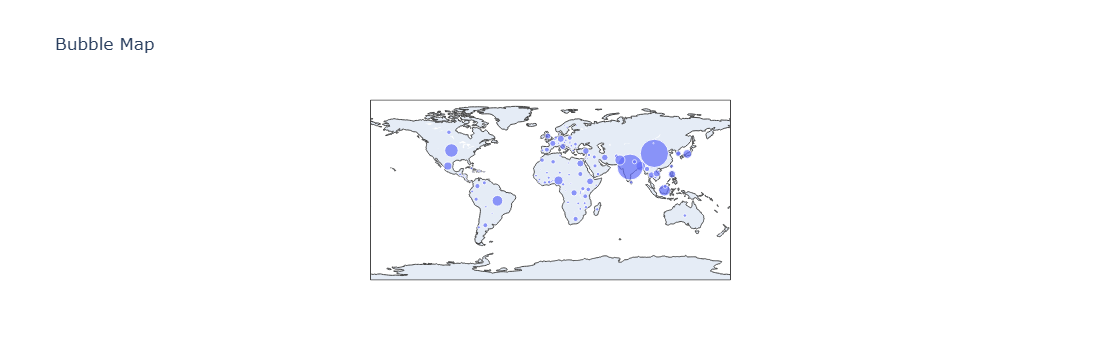

In [59]:
# Create a bubble map
fig = px.scatter_geo(df, locations='iso_alpha', size='pop', hover_name='country', title='Bubble Map')
# Show the plot
fig.show()

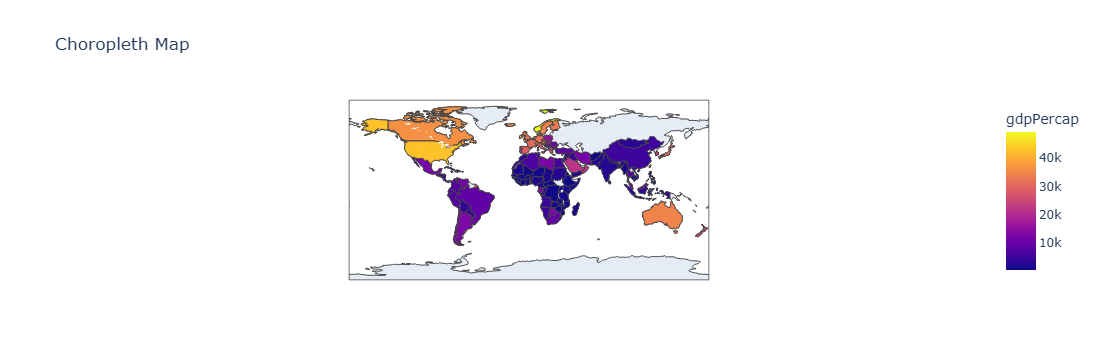

In [61]:
import plotly.express as px
# Generate sample data
df = px.data.gapminder().query("year == 2007")
# Create a choropleth map
fig = px.choropleth(df, locations='iso_alpha', color='gdpPercap', hover_name='country', title='Choropleth Map')
# Show the plot
fig.show()